<a href="https://colab.research.google.com/github/DenJiwoo/CCMACLRN_EXERCISES_COM231ML/blob/main/Copy_of_Exercise1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 1

Create a model using K-Nearest Neigbors to perform classification using the personality dataset.

0 -'introvert'

1 - 'extrovert'

## A. Import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

## B. Load and understand the dataset

Display the first 5 rows of the dataset using `.head()`

In [ ]:
df = pd.read_excel("MLData.xlsx")

Display the summary of all the features of the dataset using `.info()`

In [ ]:
df.head()

,Name,Post/Share Frequently,Active,Replies to comments/messages,Friends/Follwers,Personality
0,Danielle,0,1,0,996,0
1,Jonel,0,1,0,110,0
2,Darren,0,1,0,871,1
3,Luis,0,1,0,78,1
4,Matthew,1,1,1,855,1


Display the total number of samples from each label using `.value_counts()`

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Name                          100 non-null    object
 1   Post/Share Frequently         100 non-null    int64 
 2   Active                        100 non-null    int64 
 3   Replies to comments/messages  100 non-null    int64 
 4   Friends/Follwers              100 non-null    int64 
 5   Personality                   100 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 4.8+ KB


Use a histogram to display the number of followers for each samples
 - The x axis should be the number of followers/friends
 - The y axis should be the number of samples in the dataset

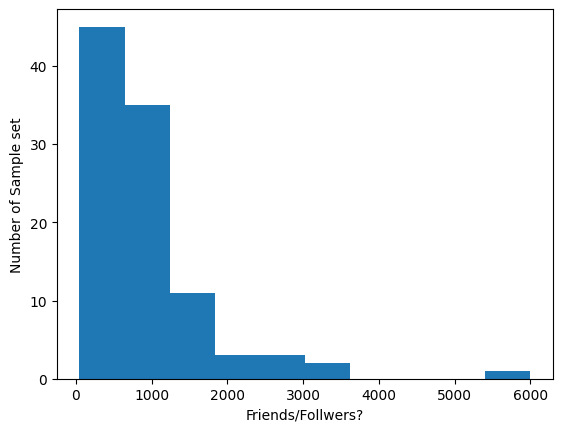

In [ ]:
plt.hist(df["Friends/Follwers"])
plt.xlabel("Friends/Follwers?")
plt.ylabel("Number of Sample set")
plt.show()

Remove the name column using `drop()` method

In [ ]:
df = df.drop(columns=['Name'])

## C. Split the dataset into training and test set

Convert the features into an numpy array using `.values()` and store it in a variable "X"

In [ ]:
X = df.drop(columns=['Personality']).values
X

array([[   0,    1,    0,  996],
       [   0,    1,    0,  110],
       [   0,    1,    0,  871],
       [   0,    1,    0,   78],
       [   1,    1,    1,  855],
       [   0,    1,    1, 3200],
       [   0,    1,    1,  568],
       [   1,    1,    1,  338],
       [   1,    1,    1,  764],
       [   0,    1,    0,  777],
       [   1,    1,    1,  385],
       [   0,    0,    1,   67],
       [   1,    1,    1,  325],
       [   1,    1,    1,  814],
       [   0,    1,    1,  239],
       [   0,    1,    0,  958],
       [   0,    1,    1,  357],
       [   1,    1,    0,  807],
       [   0,    1,    0,   46],
       [   0,    1,    0,  140],
       [   1,    1,    1,  197],
       [   1,    1,    1, 1659],
       [   1,    1,    1,  693],
       [   0,    1,    0,  735],
       [   0,    1,    0,  577],
       [   1,    1,    1,  418],
       [   1,    1,    1,  177],
       [   1,    1,    1,  571],
       [   1,    1,    1, 3000],
       [   1,    1,    1, 1100],
       [  

Convert the labels into an numpy array using `.values()` and store it in a variable "y"

In [ ]:
y = df["Personality"].values
y

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0])

Use `train_test_split()` to split the data.

- Declare a variable `X_train` that will hold the training data
- Declare a variable `X_test` that will hold the test data
- Declare a variable `y_train` that will hold the label of the training data
- Declare a variable `y_test` that will hold the label of the test data


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.18, random_state=1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(82, 4)
(82,)
(18, 4)
(18,)


Display the dimensions of each variables using `.shape()`

In [ ]:
df.shape

(100, 5)

## D. Create the model

Use KNN as a classifier by using `KNeighborsClassifier()`

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)

Train the model using the `.fit()`

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

Test the model using the `.predict()`

In [ ]:
y_pred = knn.predict(X_test)

## E. Evaluate the model

Create a confusion matrix

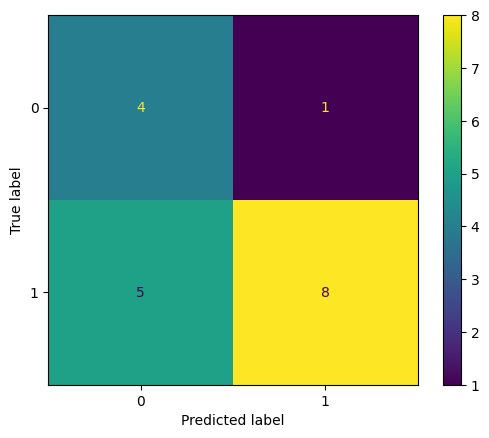

In [ ]:
conf_matrix = confusion_matrix(y_pred, y_test, labels=knn.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=knn.classes_)
disp.plot()

Display the accuracy

In [ ]:
metrics.accuracy_score(y_test, y_pred)

0.6666666666666666

Display the precision

In [ ]:
precision = precision_score(y_test, y_pred, average=None)
print("Precision:", precision)

Precision: [0.8        0.61538462]


Display the recall

In [ ]:
recall = recall_score(y_test, y_pred, average=None)
print("Recall:", recall)

Recall: [0.44444444 0.88888889]


Display the f1-score

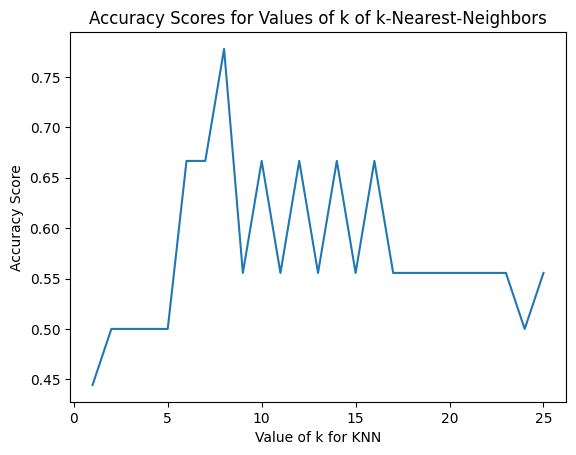

In [ ]:
# experimenting with different n values
k_range = list(range(1,26))
scores = []

for k in k_range:

    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the model
    knn.fit(X_train, y_train)

    # Test the model
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()


## F. Predict your own personality

Enter your own features and use the model to generate a prediction using `.predict()`

In [ ]:
knn.predict([[1, 1, 300, 0]])

array([0])